## Loading and manipulation of data, 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio

from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem, Descriptors
from rdkit import DataStructs
import molplotly
import plotly.express as px

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pio.renderers
pio.renderers.default = "notebook_connected"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
odor = pd.read_excel('tobaccocontrol_2018.xlsx', sheet_name = 'data', engine='openpyxl')
odor.head()

,index,class,Name,Cas,smiles,vp,RT,Description,Odour threshold,RYO_TP2,Cig_TP13,Cig_TP2,Cig_TP1,Cig_TP14,Cig_TP15,Cig_TP5,Cig_TP16,RYO_TP3,RYO_TP1,Cig_TP4,Cig_TP8,Cig_TP7,Cig_TP9,Cig_TP12,Cig_TP10,Cig_TP11,Cig_TP17,Cig_TP18,Cig_TP19,Cig_TP6,Cig_TP3,Cig_RP1,Cig_RP2,Cig_RP3,Cig_RP4,Cig_RP5,Cig_RP6,CM6,University_Kentucky,American_Virginia_flue_cured_213,Uncut_Burley,Semi_Oriental_456
0,1,flavour_additives,"1,2-propanediol, 1-acetate",627-69-0,CC(COC(=O)C)O,0.53900,5.011585,unknown,NaN,204.000000,89.000000,164.666667,147.666667,159.000000,166.666667,253.000000,242.333333,317.666667,266.333333,227.000000,301.333333,175.333333,NaN,127.000000,110.666667,112.666667,173.333333,263.0,189.333333,133.333333,155.333333,136.666667,62.000000,NaN,95.666667,146.333333,169.000000,NaN,NaN,NaN,NaN,NaN
1,2,flavour_additives,"1,2-propanediol diformate",53818-14-7,CC(COC=O)OC=O,22.60000,4.064134,unknown,NaN,221.666667,NaN,125.000000,152.000000,150.666667,95.333333,177.666667,168.000000,319.333333,183.000000,193.333333,237.000000,180.333333,NaN,94.666667,84.000000,94.000000,126.000000,189.0,139.000000,101.333333,122.666667,162.333333,NaN,NaN,73.333333,110.666667,140.333333,NaN,NaN,NaN,NaN,NaN
2,3,flavour_additives,"1,2-propanediol, 2-acetate",6214-01-3,CC(CO)OC(=O)C,0.36300,5.181566,unknown,NaN,125.333333,NaN,100.000000,87.666667,95.333333,96.000000,157.000000,147.333333,205.000000,172.000000,138.000000,184.000000,106.000000,NaN,74.666667,65.000000,67.333333,107.000000,162.0,116.000000,81.000000,94.666667,83.000000,NaN,NaN,57.000000,88.666667,101.333333,NaN,NaN,NaN,NaN,NaN
3,4,flavour_additives,menthol,1490-04-6,CC1CCC(C(C1)O)C(C)C,0.00767,9.470432,MENTHOL,400.0,1143.666667,1594.333333,1330.666667,1147.666667,1099.000000,1431.666667,199.666667,81.666667,85.000000,134.666667,NaN,67.333333,NaN,290.666667,72.000000,90.333333,76.333333,NaN,NaN,591.666667,60.000000,NaN,NaN,62.333333,72.666667,NaN,63.000000,61.666667,NaN,NaN,NaN,NaN,NaN
4,5,flavour_additives,lactic acid,050-21-5,CC(C(=O)O)O,0.02860,4.291031,Miscellaneous,38000.0,NaN,NaN,75.333333,NaN,93.000000,61.000000,113.333333,NaN,NaN,NaN,NaN,NaN,115.000000,NaN,NaN,NaN,60.000000,NaN,NaN,90.666667,65.333333,73.666667,102.666667,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tabacco_df = pd.melt(odor, value_vars=['RYO_TP2', 'Cig_TP13', 'Cig_TP2', 'Cig_TP1',
       'Cig_TP14', 'Cig_TP15', 'Cig_TP5', 'Cig_TP16', 'RYO_TP3', 'RYO_TP1',
       'Cig_TP4', 'Cig_TP8', 'Cig_TP7', 'Cig_TP9', 'Cig_TP12', 'Cig_TP10',
       'Cig_TP11', 'Cig_TP17', 'Cig_TP18', 'Cig_TP19', 'Cig_TP6', 'Cig_TP3',
       'Cig_RP1', 'Cig_RP2', 'Cig_RP3', 'Cig_RP4', 'Cig_RP5', 'Cig_RP6', 'CM6',
       'University_Kentucky', 'American_Virginia_flue_cured_213',
       'Uncut_Burley', 'Semi_Oriental_456'],id_vars=['class', 'Name', 'Cas', 'smiles', 'vp', 'RT', 'Description',
        'Odour threshold'], value_name='signal_noise_ratio', var_name='tobacco')

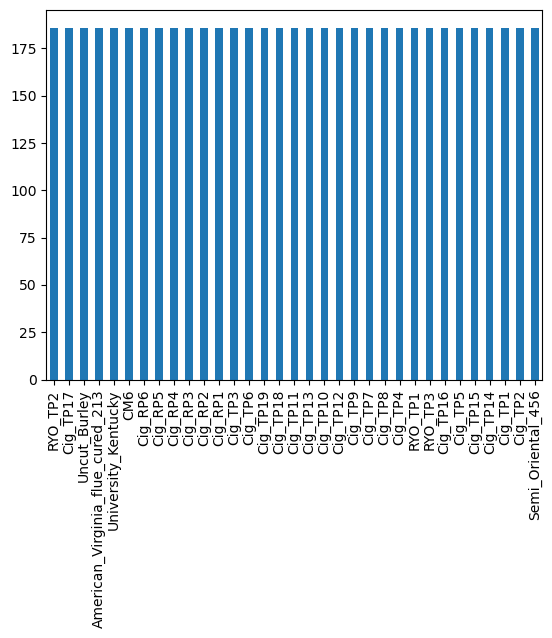

In [9]:
tabacco_df['tobacco'].value_counts().plot(kind='bar')
plt.show()

In [5]:
tabacco_df.isna().sum()

class                    0
Name                     0
Cas                      0
smiles                   0
vp                       0
RT                       0
Description              0
Odour threshold       3861
tobacco                  0
signal_noise_ratio    5122
dtype: int64

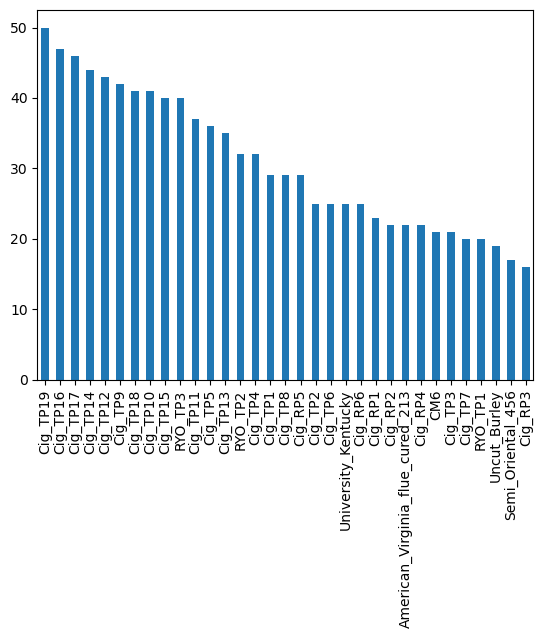

In [10]:
tabacco_df = tabacco_df.dropna(subset=['signal_noise_ratio'])
tabacco_df['tobacco'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
tabacco_df.isna().sum()

In [11]:
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem, Descriptors
from rdkit import DataStructs
import molplotly
import plotly.express as px

In [12]:
tabacco_df = tabacco_df.iloc[:,:-1]
tabacco_df['RT'] = round(tabacco_df['RT'],2)
tabacco_df = tabacco_df.sort_values(by=['tobacco', 'RT'])

In [13]:
tabacco_df['mw'] = tabacco_df['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).apply(lambda x: Descriptors.ExactMolWt(x))
tabacco_df.head()

,class,Name,Cas,smiles,vp,RT,Description,Odour threshold,tobacco,mw
5755,not_considered_flavour_additives,"2,3-pentanedione",600-14-6,CCC(=O)C(=O)C,31.100,3.06,Miscellaneous,20.0,American_Virginia_flue_cured_213,100.052429
5733,not_considered_flavour_additives,pyridine,110-86-1,C1=CC=NC=C1,19.300,3.61,Miscellaneous,NaN,American_Virginia_flue_cured_213,79.042199
5759,not_considered_flavour_additives,"furan-3-one <2-methyl-, tetrahydro->",3188-00-9,CC1C(=O)CCO1,4.590,4.11,FRUIT,NaN,American_Virginia_flue_cured_213,100.052429
5752,not_considered_flavour_additives,furfural,098-01-1,C1=COC(=C1)C=O,2.320,4.43,Miscellaneous,NaN,American_Virginia_flue_cured_213,96.021129
5753,not_considered_flavour_additives,2-furanmethanol,098-00-0,C1=COC(=C1)CO,0.409,4.70,Miscellaneous,NaN,American_Virginia_flue_cured_213,98.036779


In [14]:
fig_scatter = px.scatter(data_frame=tabacco_df, x = 'RT', y = 'vp', color = 'tobacco',template = "simple_white",
                        title='Vapor pressure', animation_frame='tobacco', size='mw')
fig_scatter.update(layout_showlegend=False)
fig_scatter = molplotly.add_molecules(fig=fig_scatter, df = tabacco_df,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name', 
                                    caption_cols= ['mw'],
                                    caption_transform={'mw': lambda x: f"{x:.2f}"})
fig_scatter.run_server(mode='inline',port=8000) 

In [15]:
fig_scatter = px.scatter(data_frame=tabacco_df, x='RT', y = 'mw', color='tobacco', size=tabacco_df['vp']**0.2,
                        template = "simple_white",trendline="ols",
                        title='Molecular Weith', animation_frame='tobacco')
fig_scatter.update(layout_showlegend=False)
fig_scatter.update_layout(xaxis_title='TR min', yaxis_title='Molecular Weith')
fig_scatter = molplotly.add_molecules(fig=fig_scatter, df = tabacco_df,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name', 
                                    caption_cols= ['mw','vp'],
                                    caption_transform={'mw': lambda x: f"{x:.2f}"},
                                    show_coords=False)
fig_scatter.run_server(mode='inline',port=1002) 

In [16]:
tabacco_df.head(2)

,class,Name,Cas,smiles,vp,RT,Description,Odour threshold,tobacco,mw
5755,not_considered_flavour_additives,"2,3-pentanedione",600-14-6,CCC(=O)C(=O)C,31.1,3.06,Miscellaneous,20.0,American_Virginia_flue_cured_213,100.052429
5733,not_considered_flavour_additives,pyridine,110-86-1,C1=CC=NC=C1,19.3,3.61,Miscellaneous,NaN,American_Virginia_flue_cured_213,79.042199


In [17]:
polar_1 = px.bar_polar(data_frame=tabacco_df, r='RT',
                    theta='Description',
                    color='tobacco',
                    animation_frame='tobacco',
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    title='Odor distribution by tabacoo class and retention time', 
                                template="plotly_dark")
polar_1.update(layout_showlegend=False)
polar_1 = molplotly.add_molecules(fig=polar_1, df = tabacco_df,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Description', 
                                    caption_cols= ['RT'],
                                    show_coords=False)

polar_1.run_server(mode='inline',port=1056) 

In [18]:
polar = px.bar_polar(data_frame=tabacco_df, r='RT',
                    theta='Description',
                    color='tobacco',
                    animation_frame='tobacco',
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    title='Odor distribution by tabacoo class and retention time', 
                                template="plotly_dark")
polar.update(layout_showlegend=False)
polar.show()

In [19]:
tabacco_odor_dist = tabacco_df.groupby(['tobacco','Description']).agg(count_by_odor = ('Description', 'count')).reset_index()
tabacco_odor_dist.head(7)

,tobacco,Description,count_by_odor
0,American_Virginia_flue_cured_213,ALCOHOL,1
1,American_Virginia_flue_cured_213,FLORAL,3
2,American_Virginia_flue_cured_213,FRUIT,3
3,American_Virginia_flue_cured_213,MENTHOL,1
4,American_Virginia_flue_cured_213,Miscellaneous,7
5,American_Virginia_flue_cured_213,SWEET,3
6,American_Virginia_flue_cured_213,unknown,4


In [20]:
polar = px.bar_polar(data_frame=tabacco_odor_dist, r='count_by_odor',
                    theta='Description',
                    color='tobacco',
                    animation_frame='tobacco',
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    title='Odor distribution by tabacoo class and odor count ',
                                template="plotly_dark")
polar.update(layout_showlegend=False)
polar.show()

# Calculing MORGANFINGERPRINT to do a cluster algorinthm

In [ ]:
tabacco_df_mfp = tabacco_df.copy(deep=True).reset_index(drop=True)
#PandasTools.AddMoleculeColumnToFrame(tabacco_df_mfp, 'smiles', 'ROMol')
#tabacco_df_mfp['mfp'] = tabacco_df_mfp['smiles'].apply(lambda x:Chem.MolFromSmiles(x)).apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius = 2,nBits = 512))

[1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0]
Number of zeros:  19
Number of ones:  13


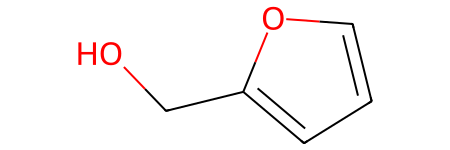

In [21]:
import random
tabacco_df_mfp = tabacco_df.copy(deep=True).reset_index(drop=True)
tabacco_df_mfp['mfp'] = tabacco_df_mfp['smiles'].apply(lambda x:Chem.MolFromSmiles(x))

mol = random.choice(tabacco_df_mfp.mfp.values)

morg_fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits = 32)
print(morg_fp1)
arr = np.zeros((0,), dtype=np.int8)
DataStructs.ConvertToNumpyArray(morg_fp1, arr)
print(arr)
#arr2 = np.vstack(arr)
print('Number of zeros: ', np.count_nonzero(arr==0))
print('Number of ones: ', np.count_nonzero(arr==1))
#print(arr2)
mol

In [22]:
tabacco_df_mfp = tabacco_df.copy(deep=True).reset_index(drop=True)
def create_fp_df_from_mols(df):
    morg_fps = df['smiles'].apply(lambda x:Chem.MolFromSmiles(x)).apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius = 2,nBits = 32))
    np_fps = []
    for fp in morg_fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        np_fps.append(arr)
    np_fps = np.vstack(np_fps)
    fpdf = pd.DataFrame(np_fps, dtype=int)
    return fpdf

In [23]:
df_mfp = create_fp_df_from_mols(tabacco_df_mfp)

In [24]:
print(df_mfp.shape)
print(tabacco_df_mfp.shape)

(1016, 32)
(1016, 10)


In [25]:
cluster_tabacoo = pd.concat([tabacco_df_mfp[['class','Name','smiles','vp','Description','tobacco']],  df_mfp ], axis=1).reset_index(drop=True)
cluster_tabacoo.head()

,class,Name,smiles,vp,Description,tobacco,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,not_considered_flavour_additives,"2,3-pentanedione",CCC(=O)C(=O)C,31.100,Miscellaneous,American_Virginia_flue_cured_213,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
1,not_considered_flavour_additives,pyridine,C1=CC=NC=C1,19.300,Miscellaneous,American_Virginia_flue_cured_213,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,not_considered_flavour_additives,"furan-3-one <2-methyl-, tetrahydro->",CC1C(=O)CCO1,4.590,FRUIT,American_Virginia_flue_cured_213,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0
3,not_considered_flavour_additives,furfural,C1=COC(=C1)C=O,2.320,Miscellaneous,American_Virginia_flue_cured_213,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0
4,not_considered_flavour_additives,2-furanmethanol,C1=COC(=C1)CO,0.409,Miscellaneous,American_Virginia_flue_cured_213,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [26]:
from sklearn.manifold import TSNE

In [27]:
#tsne = TSNE(random_state = 0, n_components=20,perplexity=2, early_exaggeration=20,  learning_rate='auto', init='random')
tsne = TSNE(random_state = 0, n_components=3,perplexity=70) # perplexity=50
tabacoo_tsne = tsne.fit_transform(df_mfp)

In [29]:
tsne_tabacoo = pd.concat([tabacco_df_mfp[['class','Name','smiles','vp','Description','tobacco']],  pd.DataFrame(tabacoo_tsne) ], axis=1).reset_index(drop=True).rename(columns={0:'tsne_1',1:'tsne_2',2:'tsne_3'})
tsne_tabacoo.head()

,class,Name,smiles,vp,Description,tobacco,tsne_1,tsne_2,tsne_3
0,not_considered_flavour_additives,"2,3-pentanedione",CCC(=O)C(=O)C,31.100,Miscellaneous,American_Virginia_flue_cured_213,-5.279030,-6.892137,-5.557687
1,not_considered_flavour_additives,pyridine,C1=CC=NC=C1,19.300,Miscellaneous,American_Virginia_flue_cured_213,11.700233,4.374950,2.541640
2,not_considered_flavour_additives,"furan-3-one <2-methyl-, tetrahydro->",CC1C(=O)CCO1,4.590,FRUIT,American_Virginia_flue_cured_213,-4.283950,3.452040,-4.782332
3,not_considered_flavour_additives,furfural,C1=COC(=C1)C=O,2.320,Miscellaneous,American_Virginia_flue_cured_213,0.023608,6.199766,-0.187805
4,not_considered_flavour_additives,2-furanmethanol,C1=COC(=C1)CO,0.409,Miscellaneous,American_Virginia_flue_cured_213,5.206196,6.373017,-3.966676


In [30]:
scatter_tsne = px.scatter(data_frame=tsne_tabacoo, x = 'tsne_1', y = 'tsne_2', color='tobacco', size=tsne_tabacoo['vp']**0.2,
                          #facet_col='tobacco', facet_col_wrap=5
                          )
scatter_tsne.update_layout(autosize=False,width=1400,height=650,)
scatter_tsne = molplotly.add_molecules(fig=scatter_tsne, df = tsne_tabacoo,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name')

#scatter_tsne.update(layout_showlegend=False)
#scatter_tsne.show()
scatter_tsne.run_server(mode='inline',port=8001) 

In [31]:
scatter_tsne_3d = px.scatter_3d(data_frame=tsne_tabacoo, x = 'tsne_1', y = 'tsne_2', z = 'tsne_3',  size=tsne_tabacoo['vp']**0.2,color='tobacco',)
#scatter_tsne_3d.update(layout_showlegend=False)
scatter_tsne_3d = molplotly.add_molecules(fig=scatter_tsne_3d, df = tsne_tabacoo,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name',
                                    caption_cols=['vp','Description'],
                                    caption_transform={'vp': lambda x: f"{x:.4f}"},
                                                       show_coords=False)

#scatter_tsne_3d.show()
scatter_tsne_3d.run_server(mode='inline',port=8002)

## Kmeans

In [32]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
## Optimal number of clusters
wcss = [] ## Within cluster squared sum 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=123)
    kmeans.fit(df_mfp.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Optimal number of clusters')
plt.xlabel('Cluester Number')
plt.plot


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=123)
sc = StandardScaler()
df_mfp_sc = sc.fit_transform(df_mfp)
clus = kmeans.fit(df_mfp_sc)

In [35]:
tsne_tabacoo_kmean = pd.concat([tsne_tabacoo, pd.DataFrame(clus.labels_)], axis=1).rename(columns={0:'K_Means'})
tsne_tabacoo_kmean.head(5)

,class,Name,smiles,vp,Description,tobacco,tsne_1,tsne_2,tsne_3,K_Means
0,not_considered_flavour_additives,"2,3-pentanedione",CCC(=O)C(=O)C,31.100,Miscellaneous,American_Virginia_flue_cured_213,-5.279030,-6.892137,-5.557687,2
1,not_considered_flavour_additives,pyridine,C1=CC=NC=C1,19.300,Miscellaneous,American_Virginia_flue_cured_213,11.700233,4.374950,2.541640,1
2,not_considered_flavour_additives,"furan-3-one <2-methyl-, tetrahydro->",CC1C(=O)CCO1,4.590,FRUIT,American_Virginia_flue_cured_213,-4.283950,3.452040,-4.782332,1
3,not_considered_flavour_additives,furfural,C1=COC(=C1)C=O,2.320,Miscellaneous,American_Virginia_flue_cured_213,0.023608,6.199766,-0.187805,1
4,not_considered_flavour_additives,2-furanmethanol,C1=COC(=C1)CO,0.409,Miscellaneous,American_Virginia_flue_cured_213,5.206196,6.373017,-3.966676,1


In [36]:
tsne_tabacoo_kmean['K_Means'] = tsne_tabacoo_kmean['K_Means'].astype(str)

In [37]:
scatter_tsnekmean = px.scatter(data_frame=tsne_tabacoo_kmean, x = 'tsne_1', y = 'tsne_2', size=tsne_tabacoo_kmean['vp']**0.2,color='K_Means',
                               title='tsne_tabacoo_kmean', template = "simple_white")

scatter_tsnekmean = molplotly.add_molecules(fig=scatter_tsnekmean, df = tsne_tabacoo_kmean,
                                    smiles_col='smiles',
                                    color_col ='K_Means',
                                    caption_cols=['tobacco','vp','Description','K_Means'],
                                    caption_transform={'vp': lambda x: f"{x:.4f}"},
                                                      show_coords=False)

scatter_tsnekmean.run_server(mode='inline',port=8068) 

In [ ]:
scatter_tsnekmean_3d = px.scatter_3d(data_frame=tsne_tabacoo_kmean, x = 'tsne_1', y = 'tsne_2', z = 'tsne_3',  size=tsne_tabacoo_kmean['vp']**0.2,color='K_Means')

scatter_tsnekmean_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))

scatter_tsnekmean_3d.show()


In [ ]:
scatter_tsnekmean_3d = px.scatter_3d(data_frame=tsne_tabacoo_kmean, x = 'tsne_1', y = 'tsne_2', z = 'tsne_3',  size=tsne_tabacoo_kmean['vp']**0.2,color='K_Means')
#scatter_tsne_3d.update(layout_showlegend=False)
scatter_tsnekmean_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
scatter_tsnekmean_3d = molplotly.add_molecules(fig=scatter_tsnekmean_3d, df = tsne_tabacoo_kmean,
                                   smiles_col='smiles',
                                   color_col = 'K_Means',
                                   title_col='Name',
                                   caption_cols=['tobacco','vp','Description','K_Means'],
                                   caption_transform={'vp': lambda x: f"{x:.4f}"},
                                                      show_coords=False)

# scatter_tsnekmean_3d.show()
scatter_tsnekmean_3d.run_server(mode='inline',port=8004)

In [ ]:
cluster_vp = tsne_tabacoo_kmean.groupby(['tobacco','K_Means','Name','smiles']).agg(vapor_pressere = ('vp', 'mean')).reset_index()


In [ ]:
cluster_vp.head(2)

In [ ]:
fig_bar = px.bar(cluster_vp, x = 'tobacco',y ='vapor_pressere'  ,color='K_Means',barmode='group',
                    template = "simple_white", title = "Vapor pressure by Tabacoo cluster")
#fig2.show()
fig_rd_bar = molplotly.add_molecules(fig = fig_bar,
                                    df = cluster_vp,
                                    smiles_col= 'smiles',
                                    title_col= 'Name',
                                    color_col= 'K_Means',
                                    caption_cols=['Name']
                                        )
fig_rd_bar.run_server(mode='inline', port=8005)

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
sc = StandardScaler()
df_mfp_sc = sc.fit_transform(df_mfp)
pca = PCA(n_components=3, random_state=123)
pca_mfp = pca.fit_transform(df_mfp_sc)

pca_tabacoo = pd.concat([tabacco_df_mfp[['class','Name','smiles','vp','Description','tobacco']],  pd.DataFrame(pca_mfp) ], axis=1).reset_index(drop=True).rename(columns={0:'pca_1',1:'pca_2',2:'pca_3'})
pca_tabacoo.head()

In [ ]:
scatter_pca = px.scatter(data_frame=pca_tabacoo, x = 'pca_1', y = 'pca_2', color='tobacco', size=tsne_tabacoo['vp']**0.2,
                          #facet_col='tobacco', facet_col_wrap=5
                          )
scatter_pca.update_layout(autosize=False,width=1600,height=650,)
scatter_pca = molplotly.add_molecules(fig=scatter_pca, df = pca_tabacoo,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name')

#scatter_tsne.update(layout_showlegend=False)
#scatter_tsne.show()
scatter_pca.run_server(mode='inline',port=8004) 

In [ ]:
scatter_pca_3d = px.scatter_3d(data_frame=pca_tabacoo, x = 'pca_1', y = 'pca_2', z = 'pca_3',  size=tsne_tabacoo['vp']**0.2,color='tobacco',)
#scatscatter_pca_3dter_tsne_3d.update(layout_showlegend=False)
scatter_pca_3d= molplotly.add_molecules(fig=scatter_pca_3d, df = pca_tabacoo,
                                    smiles_col='smiles',
                                    color_col = 'tobacco',
                                    title_col='Name')

#scatter_tsne_3d.show()
scatter_pca_3d.run_server(mode='inline',port=8005)

In [ ]:
import datamol as dm
from molfeat.calc import FPCalculator
from molfeat.store.modelstore import ModelStore

In [ ]:
from molfeat.calc import FPCalculator
from molfeat.trans import MoleculeTransformer

In [ ]:
from molfeat.calc import FPCalculator

In [ ]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
calc = FPCalculator("maccs")
X = calc(smiles)
X.shape

In [ ]:

from molfeat.calc import FP_FUNCS
FP_FUNCS.keys()

In [ ]:
calc = FPCalculator("ecfp")
X = calc(smiles)
X.shape

In [ ]:
from molfeat.calc import _CALCULATORS
_CALCULATORS.keys()

In [ ]:
from molfeat.calc import RDKitDescriptors2D
data = dm.data.freesolv().smiles.values
# Let's try a different calculator!
# This is a descriptor with all 2D, physicochemical descriptors from RDKit
calc = RDKitDescriptors2D(replace_nan=True)
print(calc.DESCRIPTORS_FN)

In [ ]:
data = dm.data.freesolv().smiles.values

# Let's try a different calculator!
# This is a descriptor with all 2D, physicochemical descriptors from RDKit
calc = RDKitDescriptors2D(replace_nan=True)

# Wrap the calculator in a transformer instance
featurizer = MoleculeTransformer(calc, dtype=np.float64)

with dm.without_rdkit_log():
    feats = featurizer(data)

feats.shape

In [ ]:
from molfeat.trans.fp import FPVecTransformer

In [ ]:
from molfeat.trans import MoleculeTransformer

In [ ]:
import datamol as dm

In [ ]:
mol = dm.to_mol("O=C(C)Oc1ccccc1C(=O)O", sanitize=True)
fp = dm.to_fp(mol)
selfies = dm.to_selfies(mol)
inchi = dm.to_inchi(mol)

In [ ]:
selfies

In [ ]:
inchi

In [ ]:
# Standardize and sanitize
mol = dm.to_mol("O=C(C)Oc1ccccc1C(=O)O")
mol = dm.fix_mol(mol)
mol = dm.sanitize_mol(mol)
mol = dm.standardize_mol(mol)

In [ ]:
# Dataframe manipulation
df = dm.data.freesolv()
mols = dm.from_df(df)

In [ ]:
mols[1]

In [ ]:
legends = [dm.to_smiles(mol) for mol in mols[:10]]
legends 

In [ ]:
# 2D viz
#legends = [dm.to_smiles(mol) for mol in mols[:10]]
dm.viz.to_image(mols[:10], legends=legends)

In [ ]:
# Generate conformers
smiles = "O=C(C)Oc1ccccc1C(=O)O"
mol = dm.to_mol(smiles)
mol_with_conformers = dm.conformers.generate(mol)

In [ ]:
mol_with_conformers

In [ ]:
mol

In [ ]:
import nglview as nv

## The Basics data mol

In [ ]:
import matplotlib.pyplot as plt
import datamol as dm

In [ ]:
# Mol from a smiles
mol = dm.to_mol("O=C(C)Oc1ccccc1C(=O)O", sanitize=True)
mol

In [ ]:
# Morgan fingerprint
fp = dm.to_fp(mol)
print(len(fp))
fp

In [ ]:
# Generate a selfies
selfies = dm.to_selfies(mol)
selfies

In [ ]:
# Get InChi
inchi = dm.to_inchi(mol)
inchi